# Title
Breast Cancer Disease Prediction

## Meta Data
Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenge against its detection is how to classify tumors into malignant (cancerous) or benign(non-cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

## Import libraries


In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
from matplotlib.cm import rainbow
import seaborn as sns
import plotly_express as px

# To ignore warning
import warnings
warnings.filterwarnings('ignore')

# For descriptive stats
import researchpy as rp
# For inferential stats
import scipy as sc

# For model development and prediction
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


## Import dataset


In [3]:
df=pd.read_csv(r'C:\Users\sania.siddiqui\Downloads\breast-cancer.csv')

Read the dataset
- Shape of data
- Size of data
- Name of columns
- Structure type of data
- Descrriptive statistics of data


In [10]:
df.shape

(569, 32)

In [11]:
df.size

18208

In [27]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [12]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [21]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [14]:
df.describe(include='object')

,diagnosis
count,569
unique,2
top,B
freq,357


In [16]:
for col in df.describe(include='object'):
    print(df[col].unique())
    print('--')

['M' 'B']
--


In [23]:
# Separate categorical variables
df_cat=df.select_dtypes(include='object')

In [24]:
df_cont=df.select_dtypes(include='number')

In [33]:
rp.summary_cat(df_cat).style.format(precision=2).background_gradient(cmap='cool')

,Variable,Outcome,Count,Percent
0,diagnosis,B,357,62.74
1,,M,212,37.26


In [34]:
rp.summary_cont(df_cont).style.format(precision=2).background_gradient()

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,id,569.00,30371831.43,125020585.61,5241135.60,20077458.72,40666204.14
1,radius_mean,569.00,14.13,3.52,0.15,13.84,14.42
2,texture_mean,569.00,19.29,4.30,0.18,18.94,19.64
3,perimeter_mean,569.00,91.97,24.30,1.02,89.97,93.97
4,area_mean,569.00,654.89,351.91,14.75,625.91,683.87
5,smoothness_mean,569.00,0.10,0.01,0.00,0.10,0.10
6,compactness_mean,569.00,0.10,0.05,0.00,0.10,0.11
7,concavity_mean,569.00,0.09,0.08,0.00,0.08,0.10
8,concave points_mean,569.00,0.05,0.04,0.00,0.05,0.05
9,symmetry_mean,569.00,0.18,0.03,0.00,0.18,0.18


# Data Cleaning
-Include identification of:
- Missing values
- Replace missing values
- Identify duplicates
- Remove duplicates
- Identify outlier
- Handle outliers

In [37]:
# Find missing Values
df.isnull().sum().sum()

0

In [39]:
# Identify duplicates
df.duplicated().sum()

0

In [86]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [95]:
df=df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','diagnosis']]

In [96]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'diagnosis'],
      dtype='object')

In [99]:
df_continous=df.select_dtypes(exclude='object')

In [100]:
# Calculate Q1 and Q3
Q1= df_continous.quantile(0.25)
Q3= df_continous.quantile(0.75)
IQR=Q3-Q1
min_range=Q1-1.5*IQR
max_range=Q3-1.5*IQR


In [101]:
# Remove outliers
df_continous = df_continous[(df_continous >= min_range) & (df_continous <= max_range)]


# Exploratory Data Analaysis
 Check the ratio of diagnosis

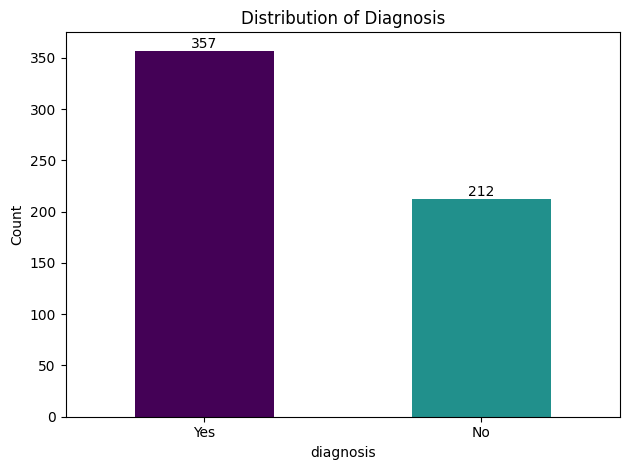

In [140]:
p1=df['diagnosis'].value_counts().plot(kind='bar',color=['#440156', '#21908C'])
plt.xticks(rotation=0)
plt.title('Distribution of Diagnosis')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(ticks=[0, 1], labels=['Yes', 'No'], rotation=0)
for bar in p1.containers:
    p1.bar_label(bar)
plt.show()

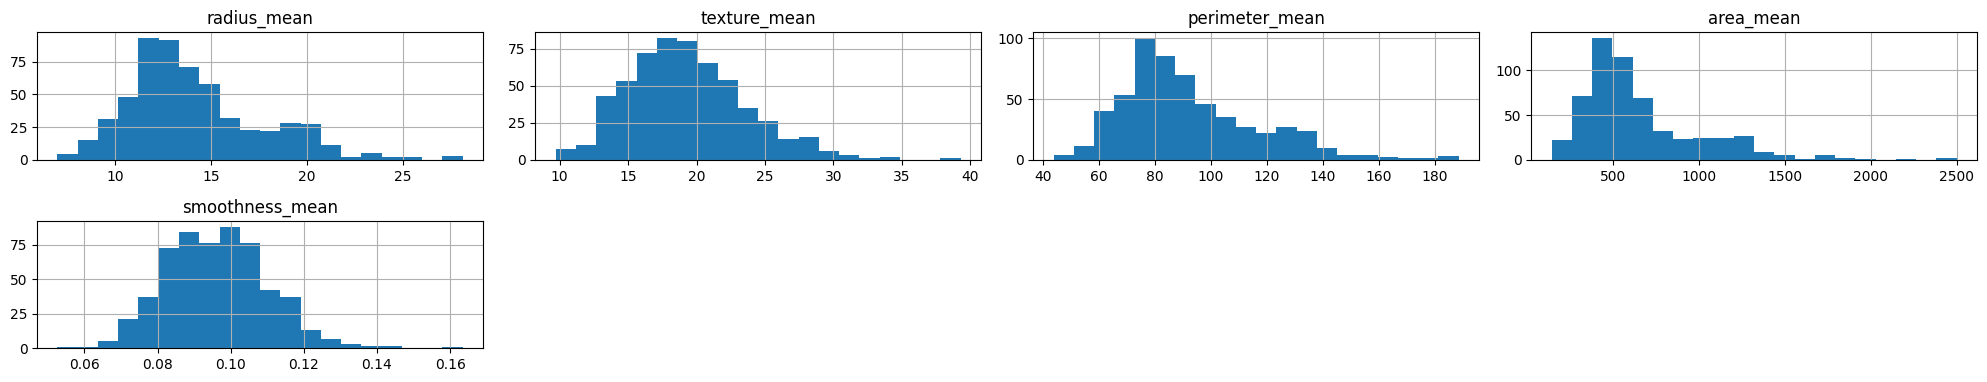

In [104]:
df.hist(bins=20, figsize=(20, 15), layout=(8, 4))
plt.tight_layout()
plt.show()

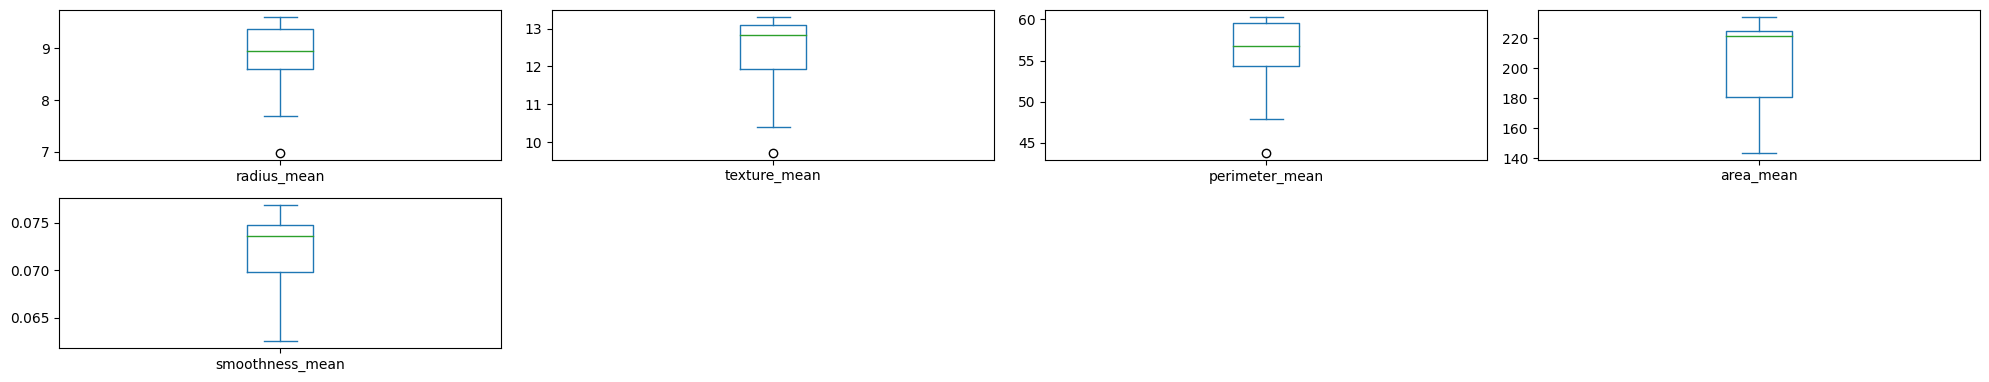

In [105]:
df_continous.plot(kind='box', figsize=(20, 15), subplots=True, layout=(8, 4))
plt.tight_layout()
plt.show()

In [107]:
# Convert 'diagnosis' column to numerical values
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Correlation
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,diagnosis
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.358560
diagnosis,0.730029,0.415185,0.742636,0.708984,0.358560,1.000000


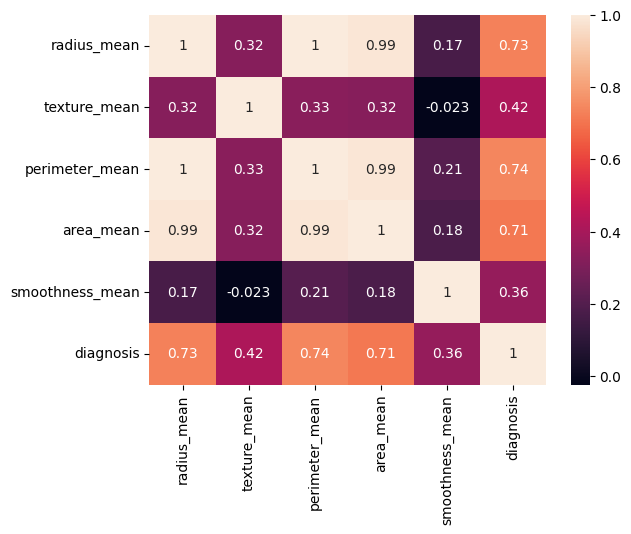

In [110]:
sns.heatmap(df.corr(),annot=True)
plt.show()

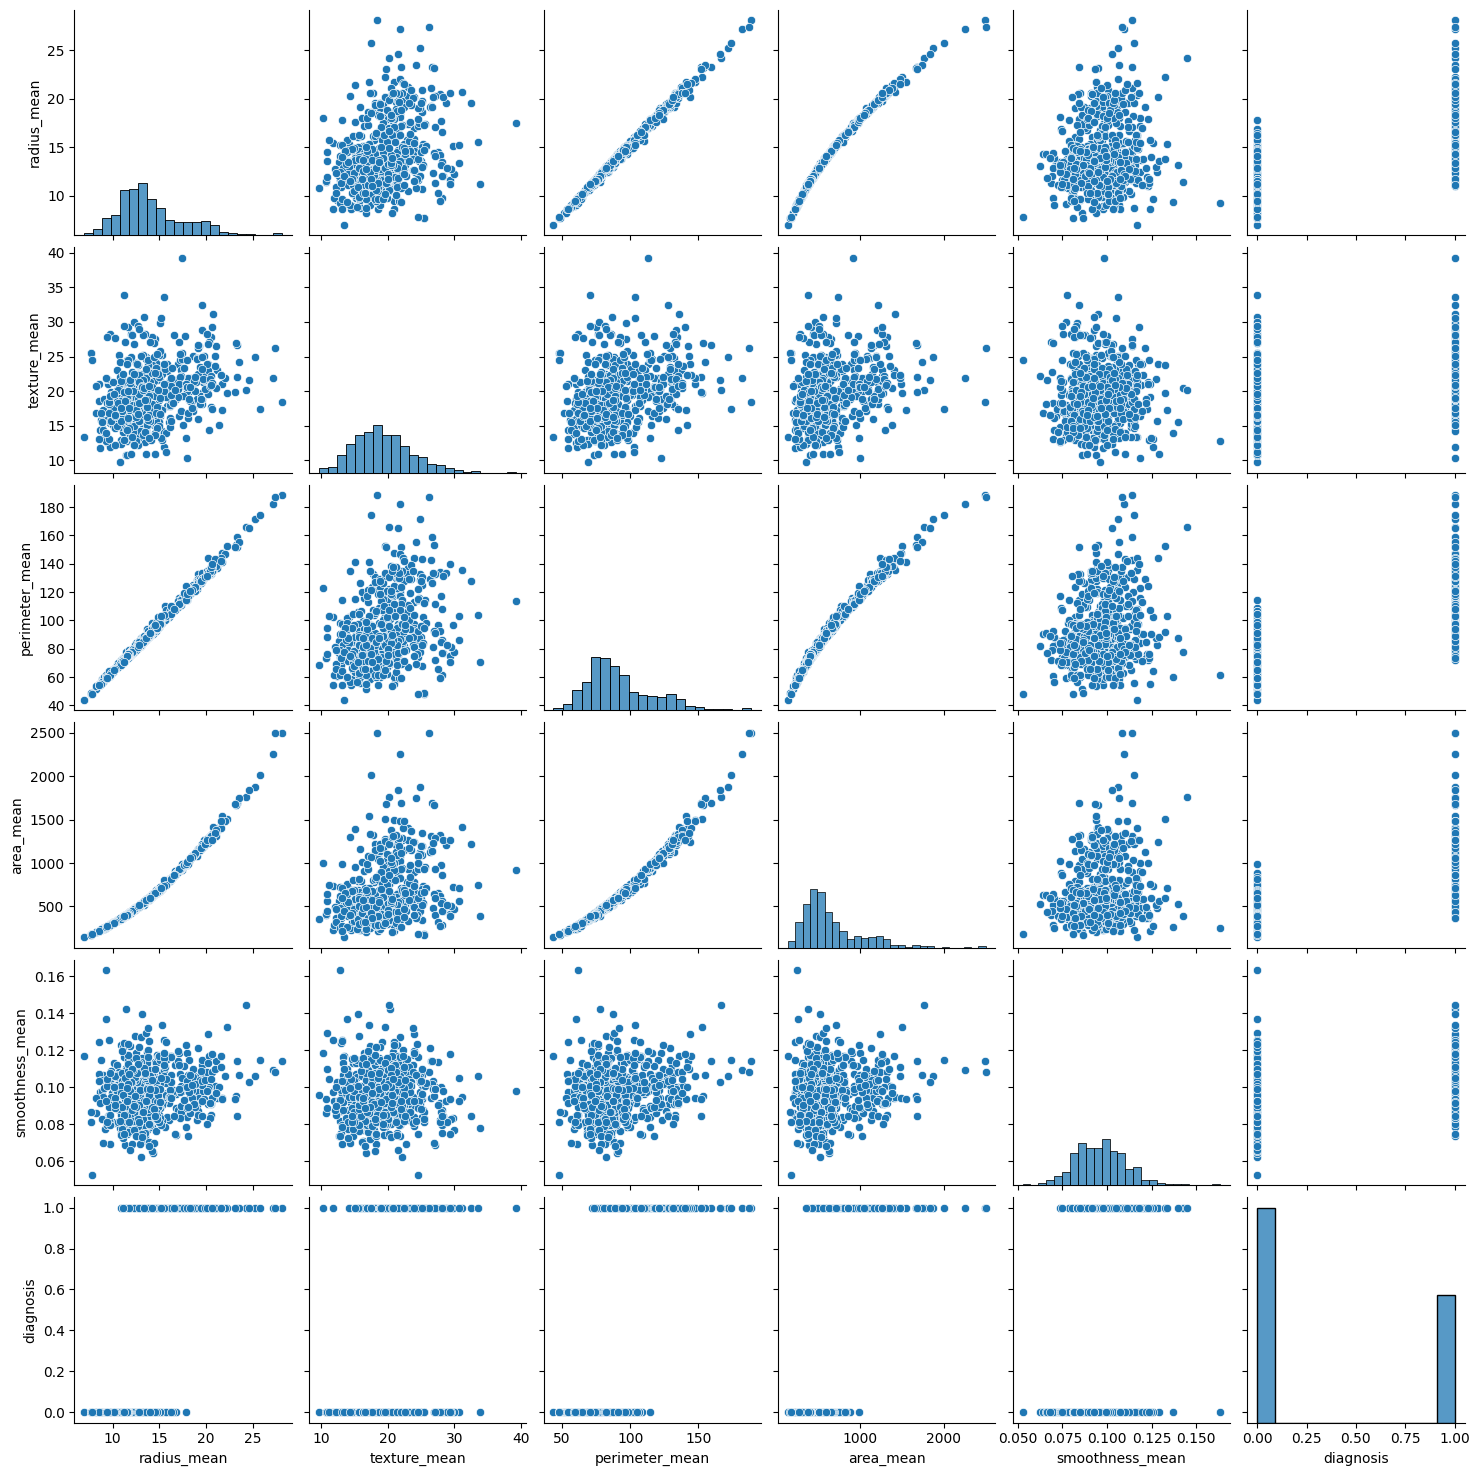

In [111]:
sns.pairplot(df)

In [112]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'diagnosis'],
      dtype='object')

In [115]:
# Machine Learning Models
X = df.iloc[:, :-1]
y=df['diagnosis']


In [116]:
# Split the data for training and testing
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [117]:
# Shape of x and y
X_train.shape ,y_train.shape ,x_test.shape,y_test.shape

((455, 5), (455,), (114, 5), (114,))

In [118]:
# Standardize the features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
x_test=scaler.fit_transform(x_test)

In [119]:
# Model
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [120]:
y_pred=model.predict(x_test)

In [121]:
# Model Accuracy
print('Accuracy:',accuracy_score(y_test,y_pred)*100,'%')

Accuracy: 96.49122807017544 %
